# Digit Recognition

In this project, the goal is to correctly identify digits from a dataset of tens of thousands of handwritten images. 

Kaggle competition site: [Digit Recognizer](https://www.kaggle.com/c/digit-recognizer)

![digits](https://www.researchgate.net/profile/Hugo_Larochelle/publication/200744481/figure/fig1/AS:668968306098181@1536505881710/Samples-from-the-MNIST-digit-recognition-data-set-Here-a-black-pixel-corresponds-to-an.png)

### Import Libraries 

Before we start exploring this dataset, we need to import libraries. This will allow us to visualise data and work with arrays, dataframes and building models. Some imports are done later and are situated with code that requires them. 

In [1]:
# Importing numpy, pandas and Series + DataFrame:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

# Imports for plotting:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Importing sklearn (used for building models)
import sklearn

# Importing keras, Keras is a high-level neural networks API, written in Python and capable of running on top of 
# TensorFlow, CNTK, or Theano. 
import keras

from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras. optimizers import Adam
from keras.callbacks import TensorBoard

Using TensorFlow backend.


### Importing Data 

Originally, Kaggle's csv file proveds us with 42,000 training images. This allowed me to achieve ~99% of accuracy. In this kernel we will use MNIST data alongside of Kaggle's csv file. More training data should improve the accuracy of our model. So let's see...

**Import MNIST Data**

We will insert [MNIST database of handwritten digits](http://yann.lecun.com/exdb/mnist/), available from MNIST webpage. The database has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. <br>
<br>
The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image by computing the center of mass of the pixels, and translating the image so as to position this point at the center of the 28x28 field.

In [2]:
# Import mnist from keras:
from keras.datasets import mnist

# Use Keras to import MNIST database:
(MNIST_train, train_labels), (MNIST_test, test_labels) = mnist.load_data()
MNIST_train = np.vstack((MNIST_train, MNIST_test))
label = np.concatenate([train_labels, test_labels])
mnist_data = MNIST_train.reshape(-1, 28, 28, 1)

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
print('Shape of mnist_data: ' + str(mnist_data.shape) + ' and has a type of ' + str(type(mnist_data)))
print('Shape of label data: ' + str(label.shape) + " and it's type is " + str(type(label)))

Shape of mnist_data: (70000, 28, 28, 1) and has a type of <class 'numpy.ndarray'>
Shape of label data: (70000,) and it's type is <class 'numpy.ndarray'>


**Import Kaggle's Data**

In [4]:
kaggle_train = pd.read_csv('../input/train.csv')
kaggle_test = pd.read_csv('../input/test.csv')

In [5]:
print('Shape of kaggle_train data: ' + str(kaggle_train.shape) + " and it's a "  + str(type(kaggle_train)))
print('Shape of kaggle_test data: ' + str(kaggle_test.shape) + " and it's a " + str(type(kaggle_test)))

Shape of kaggle_train data: (42000, 785) and it's a <class 'pandas.core.frame.DataFrame'>
Shape of kaggle_test data: (28000, 784) and it's a <class 'pandas.core.frame.DataFrame'>


**Combine MNIST and Kaggle's Data**

To combine MNIST and Kaggle's Data, we first need to ..... 

**Combining Pixels** 

In [6]:
# Reshape mnist_data to 70,000 x 784:
mnst_data = mnist_data.reshape(-1)
mnst_data = mnst_data.reshape(70000,784)

print('Shape of mnst_data is: ' + str(mnst_data.shape))

Shape of mnst_data is: (70000, 784)


In [7]:
# Change np arrays into the DataFrame type:
mnist_df = pd.DataFrame(mnst_data)
mnist_df.columns = ['pixel'+ str(x) for x in range(0,784)]

mnist_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,147,252,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
# Display first 5 rows of train_df
kaggle_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
# Remove label by dropping from kaggle_train :
kaggle_data = kaggle_train.drop('label', axis = 1)
kaggle_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
# Combine mnist_df and kaggle_data (pixels data) together:
digit_train = pd.concat([mnist_df, kaggle_data])

print(digit_train.shape)

(112000, 784)


In [11]:
digit_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,147,252,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**Combining labels**

In [12]:
k_label = pd.DataFrame(kaggle_train['label'])

In [13]:
k_label.head()

,label
0,1
1,0
2,1
3,4
4,0


In [14]:
type(k_label)

pandas.core.frame.DataFrame

In [15]:
k_label.shape

(42000, 1)

In [16]:
m_label = pd.DataFrame(label.astype(int))
m_label.columns = ['label']

In [17]:
m_label.head()

,label
0,5
1,0
2,4
3,1
4,9


In [18]:
type(m_label)

pandas.core.frame.DataFrame

In [19]:
m_label.shape

(70000, 1)

In [20]:
labels = pd.concat([m_label,k_label])

In [21]:
labels.shape

(112000, 1)

In [22]:
# Shuffle lables and digit_train dataset:
from sklearn.utils import shuffle
labels, digit_train = shuffle(labels, digit_train, random_state=0)

Now we need to work with Kaggle's dataset. We will have a sneak peak at this data by using .head() function. 

We also need to extract label and save it as kaggle_label. After that we create kaggle_data DataFrame, which is basically kaggle_train after dropping label column. 

### Visualising Data for 'Digit Recognition dataset' 

In [23]:
digit_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
35305,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
55804,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
42083,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
67756,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27046,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [24]:
digit_train.shape

(112000, 784)

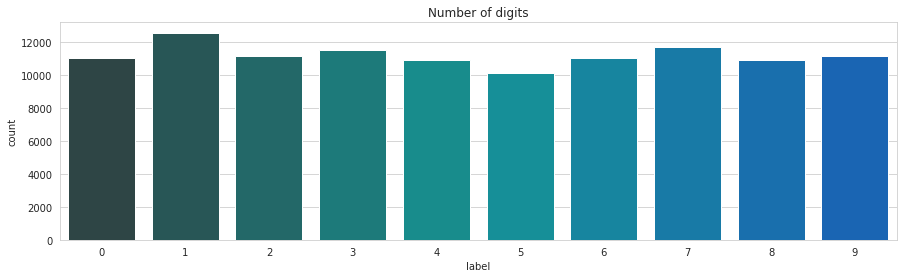

In [25]:
# Bar chart of frequency of digit occurance in our train dataset:
plt.figure(figsize=(15,4))
sns.countplot(x = 'label', data=labels,  palette = 'winter_d')
plt.title('Number of digits')
plt.show()

In [26]:
# digit_test_df set doesn't have a label, so we want to use it for testing and submission
kaggle_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [27]:
kaggle_test.shape

(28000, 784)

In [28]:
# Specify arrays (matrices) for training and testing data: 
training = np.array(digit_train, dtype = 'float32')

labels = np.array(labels, dtype = 'float32')

testing = np.array(kaggle_test, dtype = 'float32')

1.0


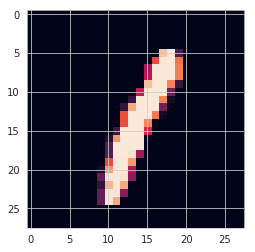

In [29]:
# Visualising digit in a random row (needs to be reshaped to original dimention 28x28):
from numpy import random
i = np.random.randint(1,112000)

plt.imshow(training[i,:].reshape(28,28))
label = labels[i,0]
print(label)

### Training the Model 

In [30]:
# Normalise the data for training:
X_train = training/255
y_train = labels

In [31]:
# Normalise the data for testing 
X_test = testing/255

In [32]:
# Importing train_test_split from sklearn:
from sklearn.model_selection import train_test_split

X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 9697)

In [33]:
# Reshaping the data: 
X_train = X_train.reshape(X_train.shape[0],*(28,28,1))
X_test = X_test.reshape(X_test.shape[0], *(28,28,1))
X_validate = X_validate.reshape(X_validate.shape[0],*(28,28,1))

In [34]:
# Data augmentation, (we rescaled the data previously so rescale = 1):
data_generator = ImageDataGenerator(rescale = 1, rotation_range = 12, zoom_range = 0.15, width_shift_range = 0.125,
                                    height_shift_range = 0.125)

data_generator.fit(X_train)
data_generator.fit(X_test)

In [35]:
X_train.shape

(89600, 28, 28, 1)

In [36]:
X_validate.shape

(22400, 28, 28, 1)

In [37]:
# Build model in a sequential form: 
cnn_model = Sequential()

In [38]:
# We can also use 64 kernels instead of 32, our imput shape (image) is of size 28x28x1 and activation function is relu:
cnn_model.add(Conv2D(filters = 32, kernel_size = (5,5), padding = 'Same', 
                     input_shape = (28,28,1), activation = 'relu'))


In [39]:
# Add max pooling layer
cnn_model.add(MaxPooling2D(pool_size = (2,2)))

In [40]:
# Add Conv2D:
cnn_model.add(Conv2D(64, (3,3), activation = 'relu'))

In [41]:
# Add dropout
cnn_model.add(Dropout(0.5))

In [42]:
# Flatten the model (into one single array)
cnn_model.add(Flatten())

In [43]:
# Adding the dense function:
cnn_model.add(Dense(output_dim = 32, activation = 'relu'))

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32)`
  


In [44]:
# Replacing sigmoid activation function by softmax did not improve prediction:
cnn_model.add(Dense(output_dim = 10, activation = 'sigmoid'))

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=10)`
  


In [45]:
# Training the model with Adam optimizer:
cnn_model.compile(loss = 'sparse_categorical_crossentropy', optimizer = Adam(lr = 0.001), metrics = ['accuracy'])

In [46]:
# Specify number of epochs and train the model on epochs:
epochs = 35

In [47]:
cnn = cnn_model.fit(X_train, y_train, batch_size = 512, nb_epoch = epochs, verbose = 1, 
              validation_data = (X_validate, y_validate))

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 89600 samples, validate on 22400 samples
Epoch 1/35
89600/89600 [==============================] - 44s 495us/step - loss: 0.3855 - acc: 0.8843 - val_loss: 0.1022 - val_acc: 0.9699
Epoch 2/35
89600/89600 [==============================] - 44s 489us/step - loss: 0.0904 - acc: 0.9730 - val_loss: 0.0622 - val_acc: 0.9809
Epoch 3/35
89600/89600 [==============================] - 43s 477us/step - loss: 0.0630 - acc: 0.9809 - val_loss: 0.0495 - val_acc: 0.9844
Epoch 4/35
89600/89600 [==============================] - 42s 471us/step - loss: 0.0504 - acc: 0.9847 - val_loss: 0.0384 - val_acc: 0.9878
Epoch 5/35
89600/89600 [==============================] - 42s 473us/step - loss: 0.0425 - acc: 0.9865 - val_loss: 0.0334 - val_acc: 0.9895
Epoch 6/35
89600/89600 [==============================] - 42s 471us/step - loss: 0.0360 - acc: 0.9885 - val_loss: 0.0339 - val_acc: 0.9899
Epoch 7/35
89600/89600 [==============================] - 42s 468us/step - loss: 0.0324 - acc: 0.9897 - val_loss: 0.

### Evaluating the Model

In [48]:
evaluation = cnn_model.evaluate(X_train, y_train)
print('Test acuracy: {:.3f}'.format(evaluation[1]))

89600/89600 [==============================] - 19s 206us/step
Test acuracy: 0.999


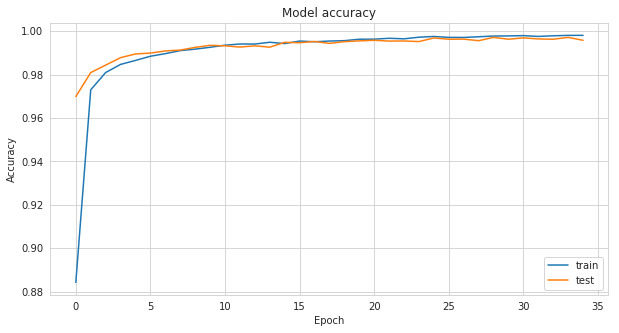

In [49]:
# Visualising the training model accuracy:
import os

plt.figure(figsize = (10,5))
#plt.subplot(2,1,1)
plt.plot(cnn.history['acc'])
plt.plot(cnn.history['val_acc'])

# Adding title, labels and legend:
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc = 'lower right')

plt.show()

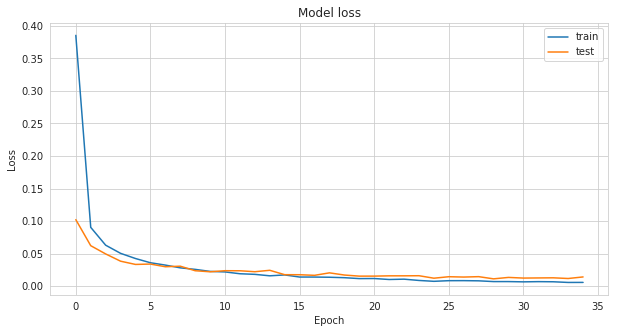

In [50]:
# Visualising the training model loss:
plt.figure(figsize = (10,5))
#plt.subplot(2,1,2)
plt.plot(cnn.history['loss'])
plt.plot(cnn.history['val_loss'])

# Adding title, labels and legend:
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc = 'upper right')

plt.show()

In [51]:
# Evaluation with confution matrix:
predicted_classes = cnn_model.predict_classes(X_train)

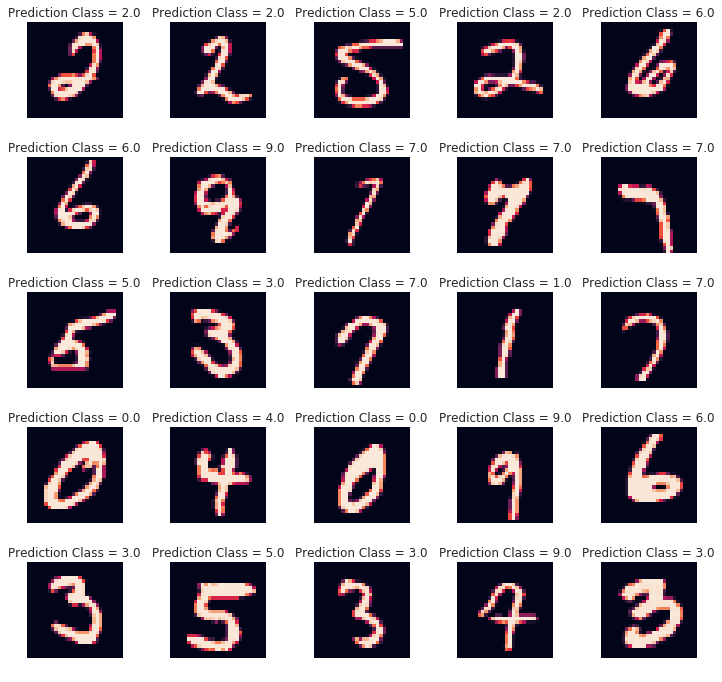

In [52]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L * W):
    axes[i].imshow(X_train[i].reshape(28,28))
    axes[i].set_title('Prediction Class = {:0.1f}'.format(predicted_classes[i]))
    axes[i].axis('off')
    
plt.subplots_adjust(wspace = 0.5)    

In [53]:
# Importing the confusion matrix:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, predicted_classes)

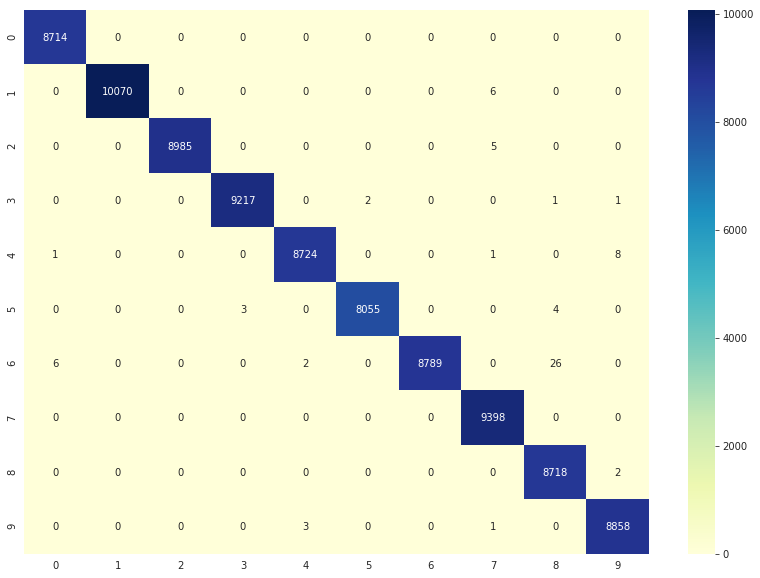

In [54]:
# Plotting heatmap for the confusion matrix:
plt.figure(figsize = (14,10))
sns.heatmap(cm, cmap='YlGnBu', annot = True, fmt = 'g')
# Sum the diogonal element to get the total true correct values

In [55]:
# To obtain classification report:
from sklearn.metrics import classification_report

num_classes = 10
target_names = ['label{}'.format(i) for i in range(num_classes)]

print(classification_report(y_train, predicted_classes, target_names = target_names))

              precision    recall  f1-score   support

      label0       1.00      1.00      1.00      8714
      label1       1.00      1.00      1.00     10076
      label2       1.00      1.00      1.00      8990
      label3       1.00      1.00      1.00      9221
      label4       1.00      1.00      1.00      8734
      label5       1.00      1.00      1.00      8062
      label6       1.00      1.00      1.00      8823
      label7       1.00      1.00      1.00      9398
      label8       1.00      1.00      1.00      8720
      label9       1.00      1.00      1.00      8862

    accuracy                           1.00     89600
   macro avg       1.00      1.00      1.00     89600
weighted avg       1.00      1.00      1.00     89600



### Make a prediction for testing set 

In [56]:
prediction = cnn_model.predict_classes(X_test)

In [57]:
prediction.shape

(28000,)

In [58]:
id_list = np.arange(1,28001)

In [59]:
id_list

array([    1,     2,     3, ..., 27998, 27999, 28000])

In [60]:
# Combine ImageID and Label into one DataFrame:
final_result = pd.DataFrame({'Label': prediction, 'ImageId': id_list})
final_result = final_result[['ImageId', 'Label']]

In [61]:
# Downloading final_result dataset as digit_output.csv:
final_result.to_csv('digit_output.csv', index = False)